In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#Data loading
file_path = 'E:\\korepetycje_Jakub_Bozek\\korepetycje-1\\projekty\\projekt1\\Descriptors.xlsx'
data = pd.read_excel(file_path)

In [97]:
#Basic informations
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 211 entries, Name to fr_urea
dtypes: float64(103), int64(107), object(1)
memory usage: 33.1+ KB
None
       MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count          20.000000       20.000000          20.000000       20.000000   
mean            8.587107        8.587107           0.321228       -1.252924   
std             2.557957        2.557957           0.260948        0.943939   
min             5.174287        5.174287           0.008611       -2.648601   
25%             6.061779        6.061779           0.092806       -2.020616   
50%             9.315445        9.315445           0.275899       -1.282654   
75%            10.475857       10.475857           0.479610       -0.715730   
max            12.455509       12.455509           1.011373        0.491169   

             qed        SPS       MolWt  HeavyAtomMolWt  ExactMolWt  \
count  20.000000  20.000000   20.0000

In [98]:
#Data cleansing
data = data.dropna()


In [99]:
#Removal of columns with zero standard deviation

numeric_data = data.select_dtypes(include=['number'])
std_deviation = numeric_data.std()
columns_to_drop = std_deviation[std_deviation == 0].index
data = data.drop(columns=columns_to_drop)



In [100]:
# Identification and removal of outliers (3 sigma rule)
print("Shape of data before outliers removal:", data.shape)
numeric_data = data.select_dtypes(include=['number'])
mask = pd.Series([True] * len(data), index=data.index)
for col in numeric_data.columns:
    mean = data[col].mean()
    std = data[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    mask &= data[col].between(lower_bound, upper_bound)
data = data[mask]
print("Shape of data after outliers removal:", data.shape)

Shape of data before outliers removal: (20, 148)
Shape of data after outliers removal: (14, 148)


In [101]:
# Normalize data
numeric_data = data.select_dtypes(include=['number'])
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

In [102]:
# Boxplots and histograms before and after normalization
variables = ['MolWt', 'Chi0n', 'TPSA', 'NumHAcceptors', 'fr_benzene']

In [103]:
print(variables)

['MolWt', 'Chi0n', 'TPSA', 'NumHAcceptors', 'fr_benzene']


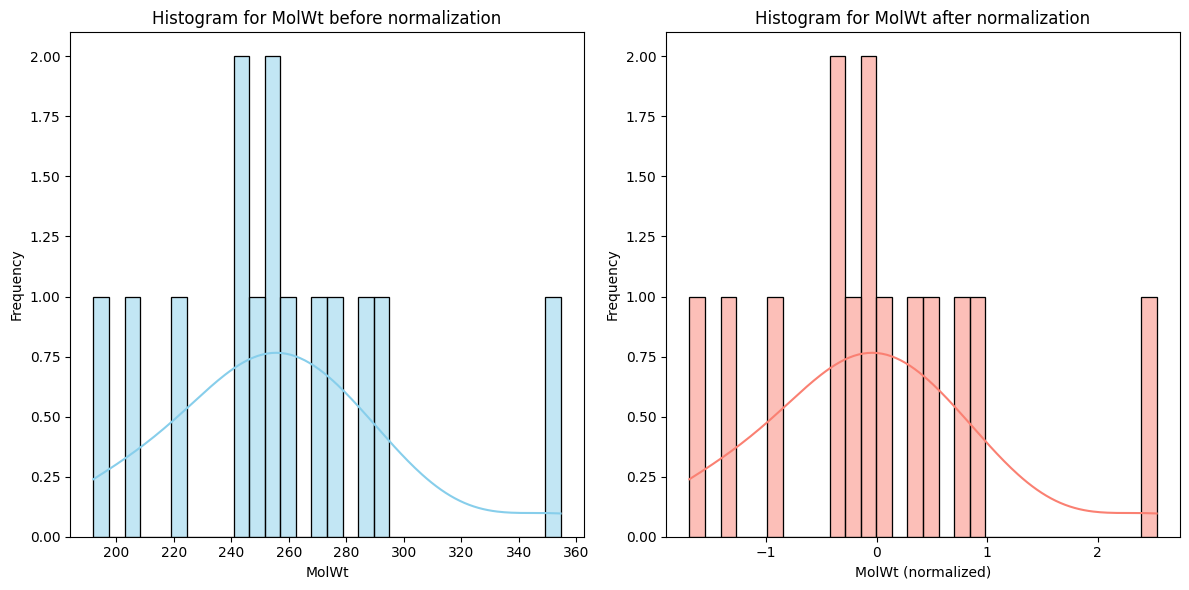

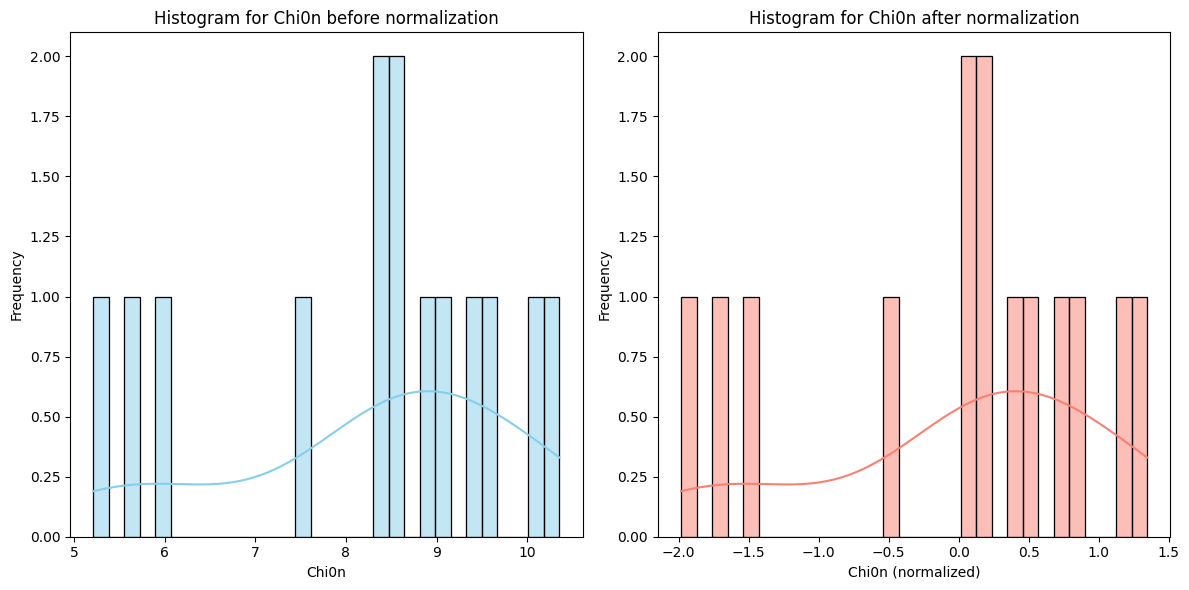

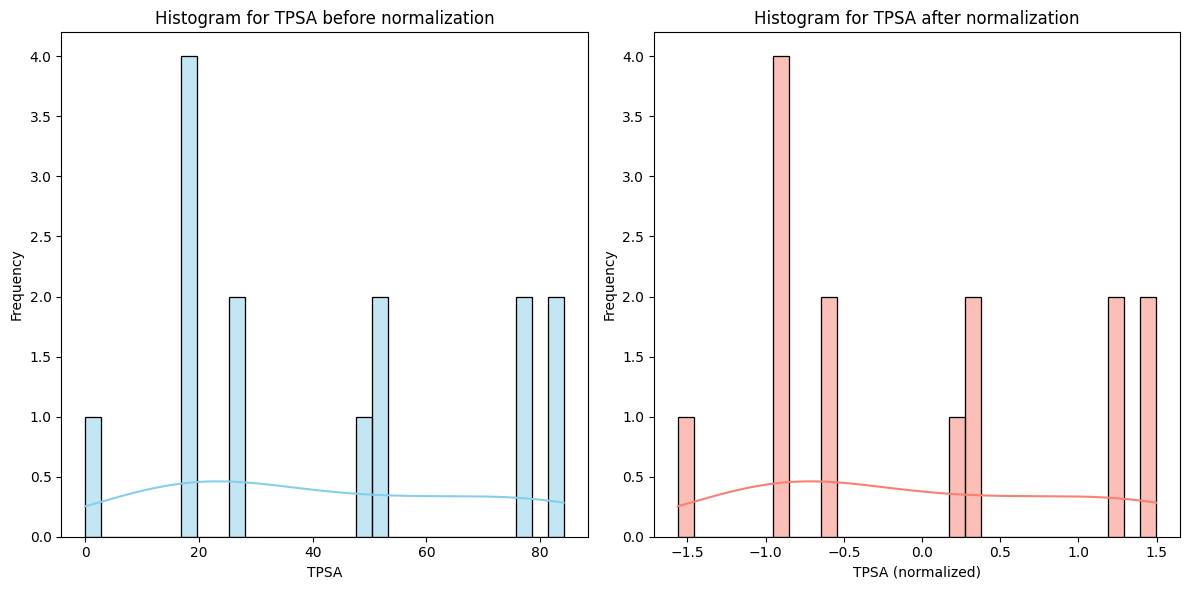

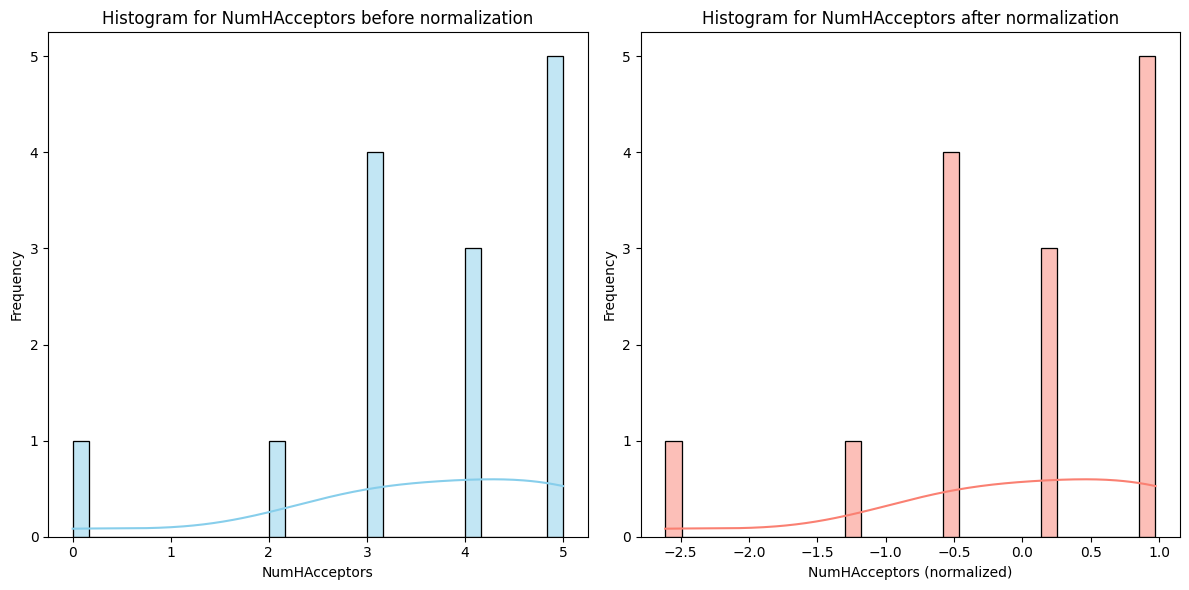

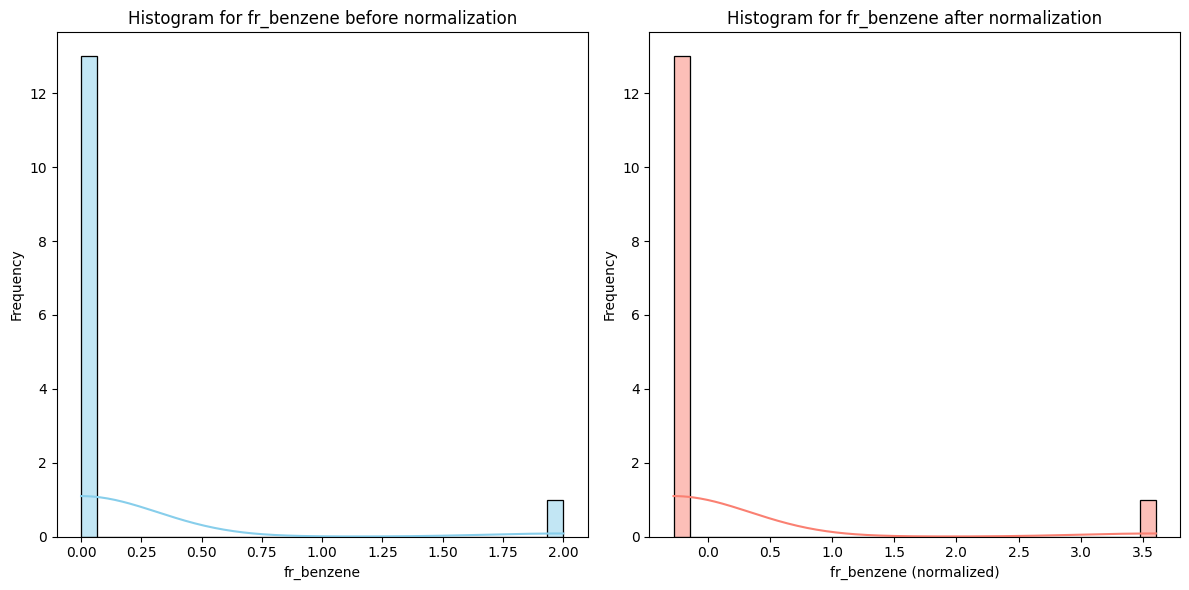

In [105]:
for var in variables:
    if var in data.columns and data[var].count() > 0:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(data[var], kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram for {var} before normalization')
        plt.xlabel(var)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.histplot(data_normalized[var], kde=True, bins=30, color='salmon')
        plt.title(f'Histogram for {var} after normalization')
        plt.xlabel(f'{var} (normalized)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f'Skipping {var} due to missing or invalid data.')




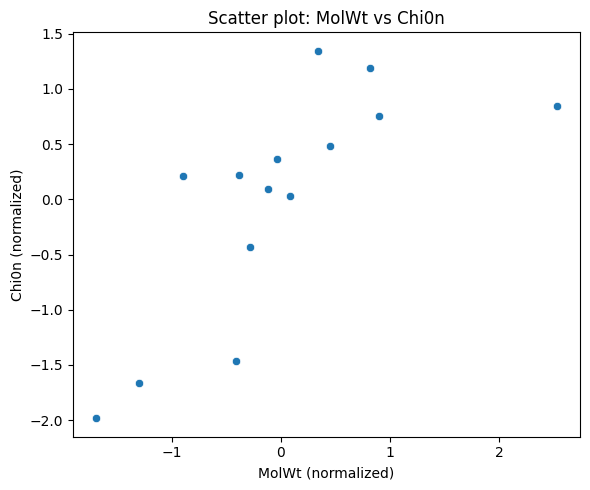

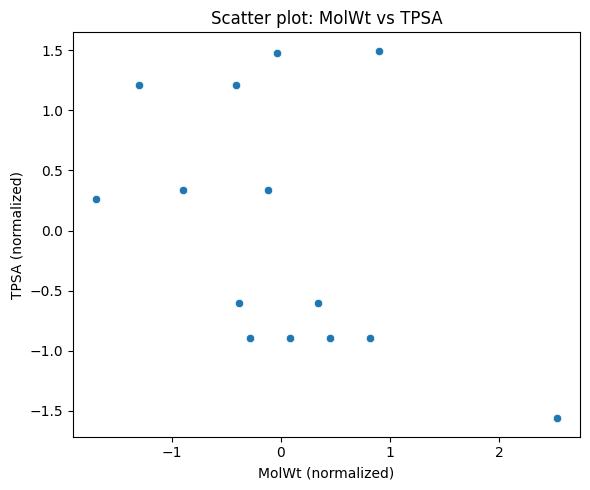

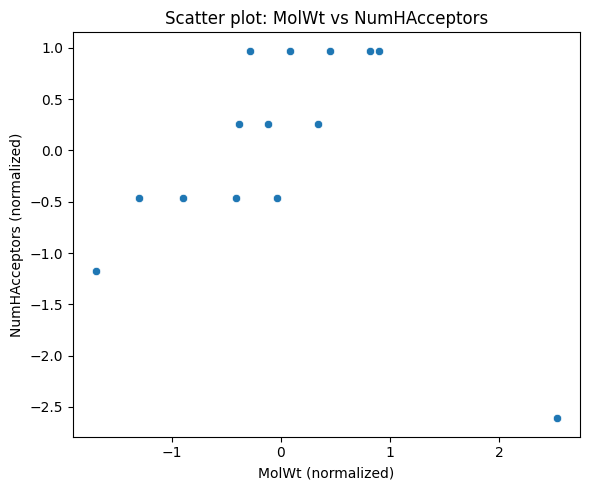

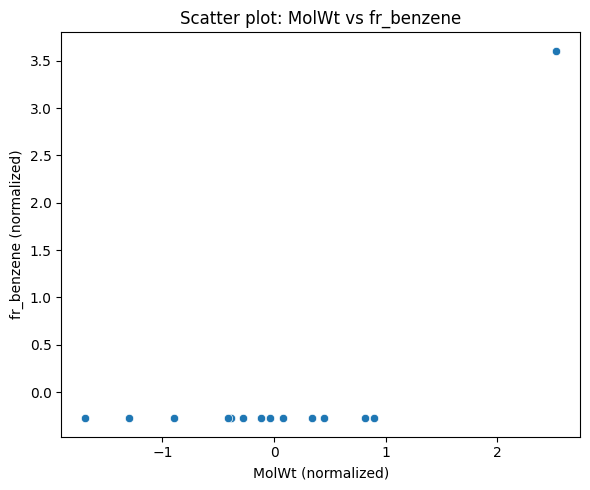

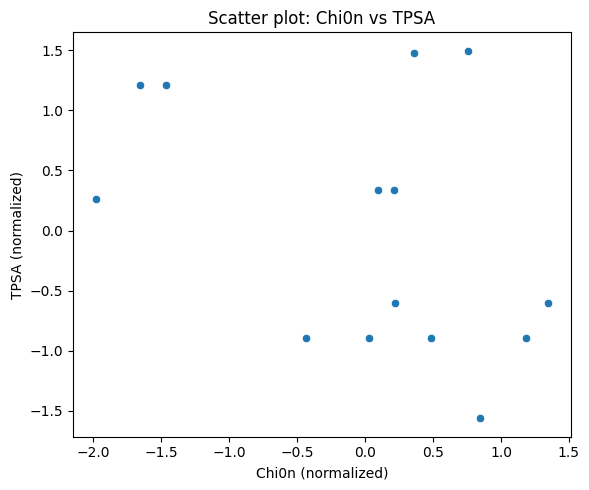

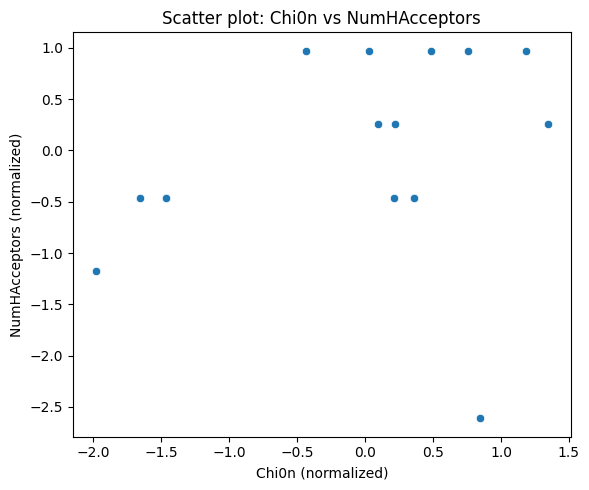

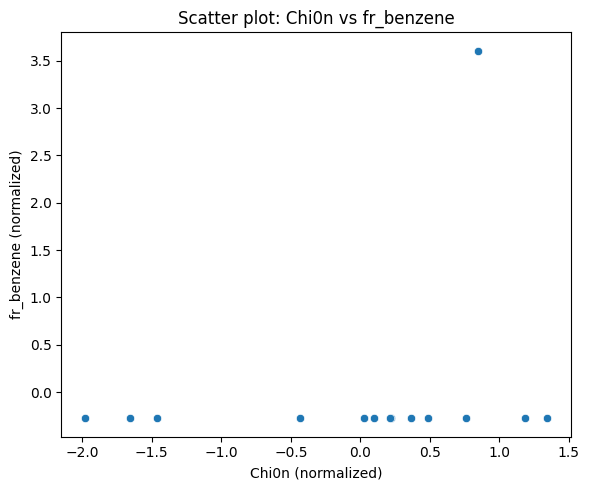

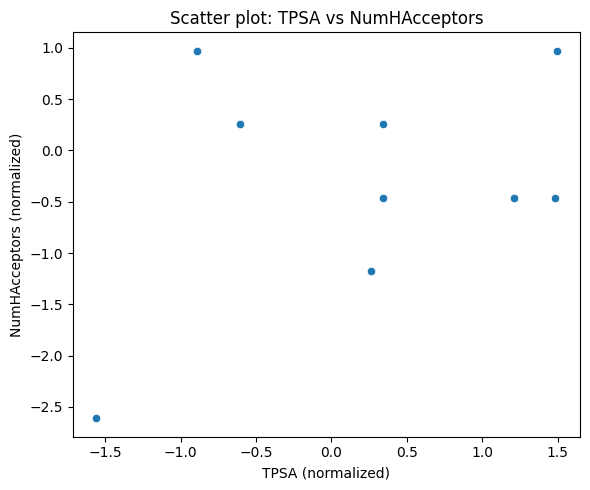

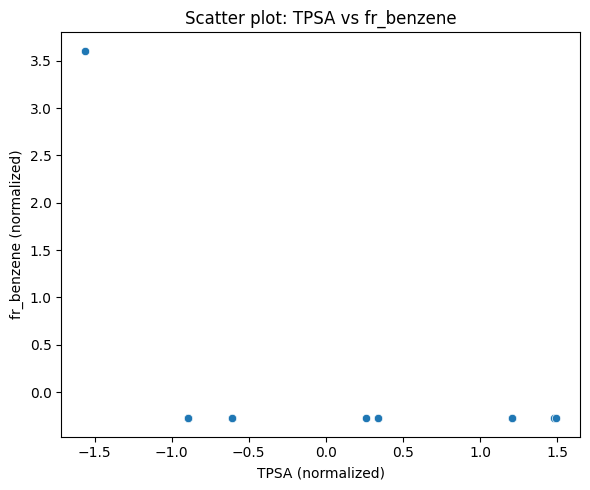

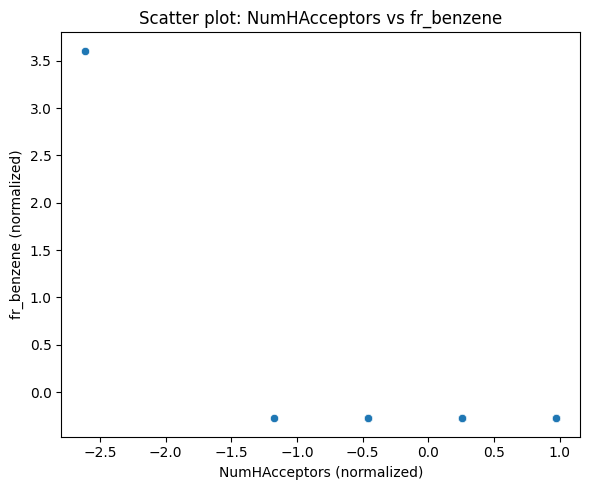

In [106]:
# Scatter plots for each pair of variables
from itertools import combinations

pairs = list(combinations(variables, 2))
for x, y in pairs:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=data_normalized[x], y=data_normalized[y])
    plt.title(f'Scatter plot: {x} vs {y}')
    plt.xlabel(f'{x} (normalized)')
    plt.ylabel(f'{y} (normalized)')
    plt.tight_layout()
    plt.show()